# U.S. Medical Insurance Costs

In the "insurance.csv" file, there are 7 columns. These are:

- Age
- Sex
- BMI
- Number of Children
- Smoking Status
- Region
- Yearly Cost of Insurance

Both categorical and numerical values exist and there are no missing values.

In [1]:
import csv

In [2]:
# list of features

age = []
sex = []
bmi = []
children = []
smoking = []
region = []
ins_cost = []

In [3]:
# import the csv file and save dataset via variables
with open('insurance.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        age.append(int(row['age']))
        sex.append(row['sex']) 
        bmi.append(float(row['bmi']))
        children.append(int(row['children']))
        smoking.append(row['smoker'])
        region.append(row['region']) 
        ins_cost.append(float(row['charges']))

'csv.DictReader' allows you to read the CSV file as dictionaries, where the keys are the column names.
Now that we have the data for each feature stored in the respective lists, we will move on to analysis.
We will inspect: 

- the average age of patients,
- the number of males and females,
- the average yearly insurance cost of the patients,
- the region of the patients.

In [4]:
average_age = sum(age) / len(age)
print(f"Average Age: {average_age}")

Average Age: 39.20702541106129


In [5]:
females = 0
males = 0
for sex in sex:
    if sex == 'female':
        females += 1
    elif sex == 'male':
        males += 1
print("Count for female: ", females)
print("Count for male: ", males)

Count for female:  662
Count for male:  676


In [6]:
average_insurance = sum(ins_cost) / len(ins_cost)
print(f"Average Yearly Insurance Charges: {average_insurance} dollars.")

Average Yearly Insurance Charges: 13270.422265141257 dollars.


In [7]:
distinct_regions = set(region)
print(distinct_regions)

{'northeast', 'northwest', 'southwest', 'southeast'}


Observing the average age, the number of females and males in the file, the average cost of insurance, and the regions of the patients help us understand if the data file we have is balanced or not. Our data should be representative of a larger population of individuals. 

The average age is about 39 years old. Males and females are equally represented. The average cost of insurance is 13270 dollars per year, and we have 4 unique U.S. regions.

Next, we can check how age can affect insurance cost and if there is a correlation between these two features.

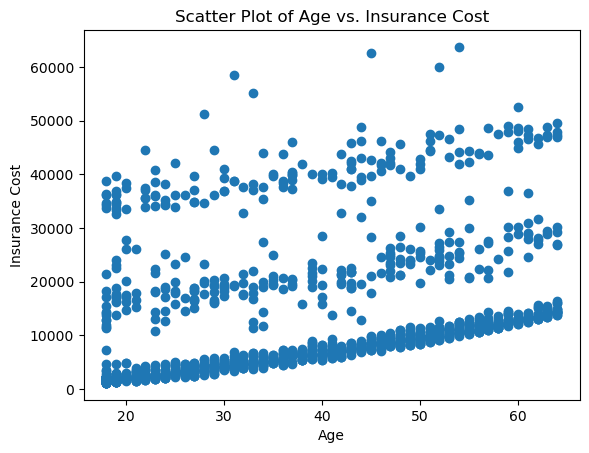

In [8]:
import matplotlib.pyplot as plt
plt.scatter(age, ins_cost)
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.title('Scatter Plot of Age vs. Insurance Cost')
plt.show()

In [9]:
from scipy import stats

# calculate the Pearson correlation coefficient
pearson_correlation, _ = stats.pearsonr(age, ins_cost)

# interpret the correlation
if pearson_correlation > 0:
    correlation_result = "Age positively correlates with insurance cost."
elif pearson_correlation < 0:
    correlation_result = "Age negatively correlates with insurance cost."
else:
    correlation_result = "Age and insurance cost are not significantly correlated."

print(f"Pearson Correlation: {pearson_correlation:.2f}")
print(correlation_result)

Pearson Correlation: 0.30
Age positively correlates with insurance cost.


In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1; where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

Next, we will inspect the data to see if smoking status has any effect on the insurance cost.

In [10]:
import numpy as np
from scipy.stats import pointbiserialr

def calculate_correlation_between_smoking_and_insurance_cost(csv_file):
    smoking = []
    insurance_cost = []

    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            smoking.append(1 if row['smoker'] == 'yes' else 0)  # Convert 'smoker' to binary
            insurance_cost.append(float(row['charges']))

    # Calculate the point-biserial correlation coefficient
    correlation_coefficient, p_value = pointbiserialr(smoking, insurance_cost)

    # Determine if smoking status significantly affects insurance costs
    alpha = 0.05
    if p_value < alpha:
        result = "Smoking status significantly affects insurance costs."
    else:
        result = "Smoking status does not significantly affect insurance costs."

    return result

result = calculate_correlation_between_smoking_and_insurance_cost('insurance.csv')
print(result)


Smoking status significantly affects insurance costs.


Here, we first convert the 'smoker' column to binary values (1 for 'yes' and 0 for 'no') and then calculate the point-biserial correlation coefficient to determine the correlation between smoking status and insurance costs. It also checks if the correlation is statistically significant based on the p-value and a predefined significance level (alpha).